In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mat73

In [2]:
# Read data
data = mat73.loadmat("SKULL-MAPS/skull_mask_bm7_dx_1mm.mat")

xi = data["xi"]
yi = data["yi"]
zi = data["zi"]

skull_mask = data["skull_mask"]
brain_mask = data["brain_mask"]

In [3]:
# Get skull points
X, Y, Z = np.meshgrid(xi, yi, zi, indexing="ij")

x_skull = X[skull_mask]
y_skull = Y[skull_mask]
z_skull = Z[skull_mask]

In [4]:
# Create a dataframe
p_skull_volume = np.hstack((x_skull[:, np.newaxis],
                            y_skull[:, np.newaxis],
                            z_skull[:, np.newaxis]))
skull_volume_df = pd.DataFrame(p_skull_volume, columns=["X", "Y", "Z"])

In [5]:
# Get minimum and maximum at each (Y, Z) points
skull_surface_inner_df = skull_volume_df.groupby(["Y", "Z"]).min().reset_index()
skull_surface_outer_df = skull_volume_df.groupby(["Y", "Z"]).max().reset_index()

# Rearrange columns
skull_surface_inner_df = skull_surface_inner_df[["X", "Y", "Z"]]
skull_surface_outer_df = skull_surface_outer_df[["X", "Y", "Z"]]

# Sort based on Y and Z columns
skull_surface_inner_df = skull_surface_inner_df.sort_values(by=["Y", "Z"])
skull_surface_outer_df = skull_surface_outer_df.sort_values(by=["Y", "Z"])

In [6]:
# Convert to numpy array
skull_surface_inner = skull_surface_inner_df.to_numpy()
skull_surface_outer = skull_surface_outer_df.to_numpy()

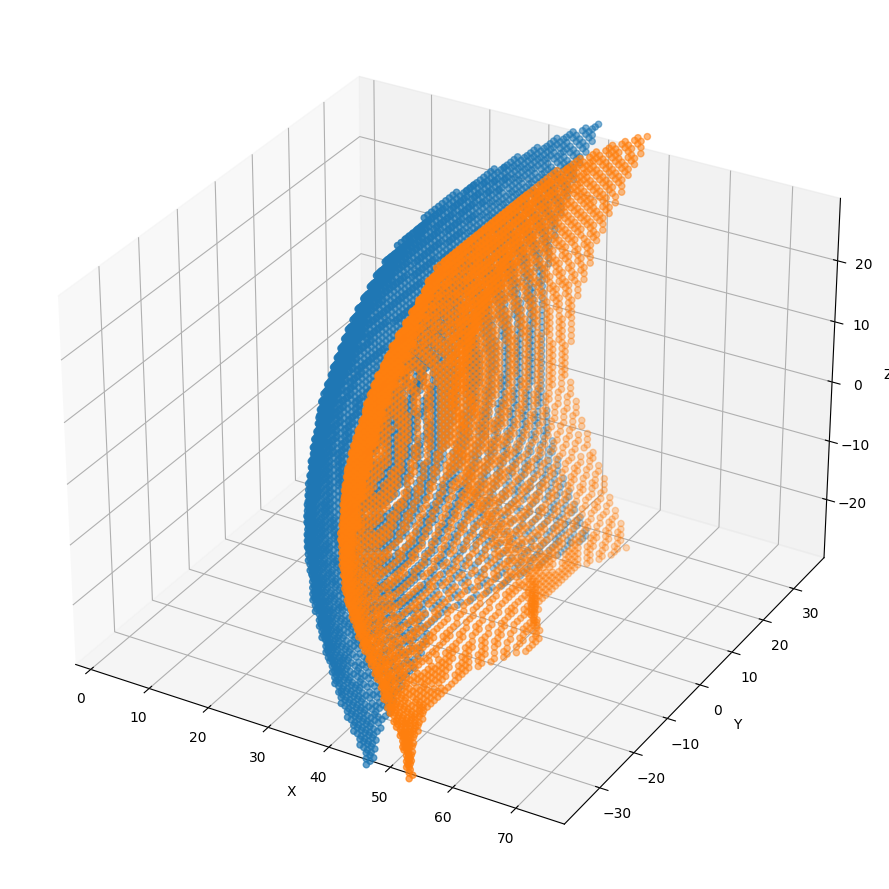

In [7]:
# Plot skull surfaces
plt.rcParams["figure.figsize"] = [9, 9]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(skull_surface_inner[:, 0], skull_surface_inner[:, 1], skull_surface_inner[:, 2])
ax.scatter(skull_surface_outer[:, 0], skull_surface_outer[:, 1], skull_surface_outer[:, 2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.axis("scaled")
plt.show()

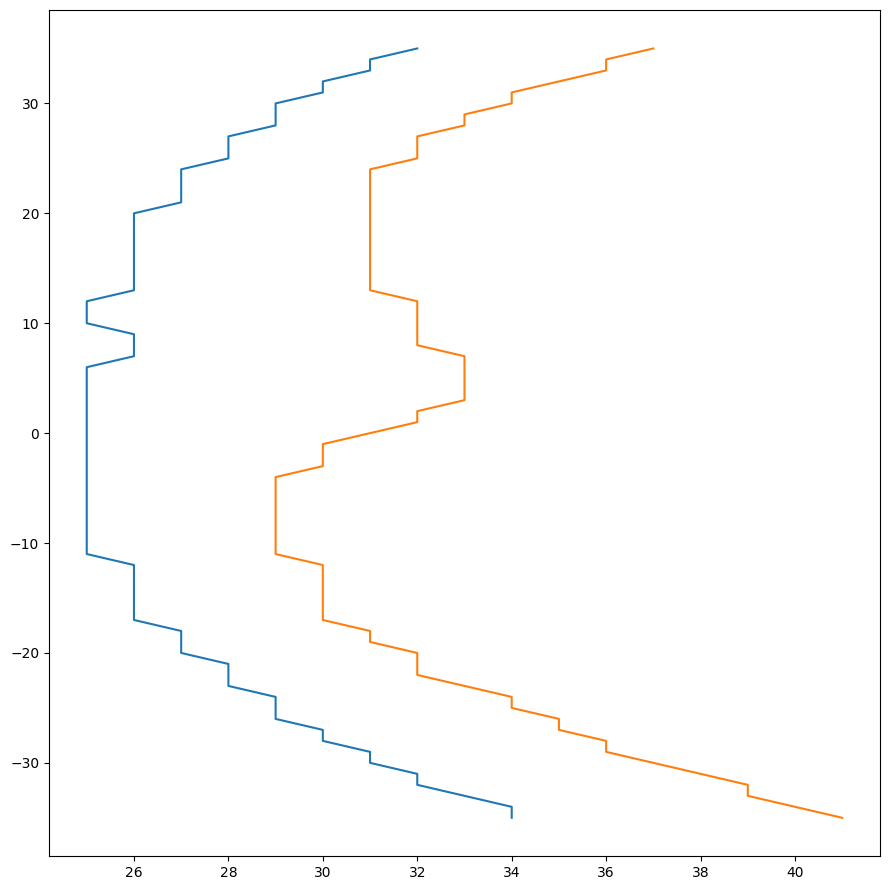

In [8]:
# Plot a slice plane
z0 = np.where(skull_surface_inner[:, 2] == 0)[0]
skull_surface_inner_z0 = skull_surface_inner[z0, :]
skull_surface_outer_z0 = skull_surface_outer[z0, :]

plt.plot(skull_surface_inner_z0[:, 0], skull_surface_inner_z0[:, 1])
plt.plot(skull_surface_outer_z0[:, 0], skull_surface_outer_z0[:, 1])

In [9]:
# Create connectivity between points
ny = yi.shape[0]
nz = zi.shape[0]

numberOfCells = (ny - 1)*(nz - 1)

cells = np.zeros((numberOfCells, 4), dtype=int)

for j in range(nz - 1):
    for i in range(ny - 1):
        cells[i + j*(ny - 1), 0] = i + j*ny
        cells[i + j*(ny - 1), 1] = i + j*ny + 1
        cells[i + j*(ny - 1), 2] = i + j*ny + ny + 1
        cells[i + j*(ny - 1), 3] = i + j*ny + ny

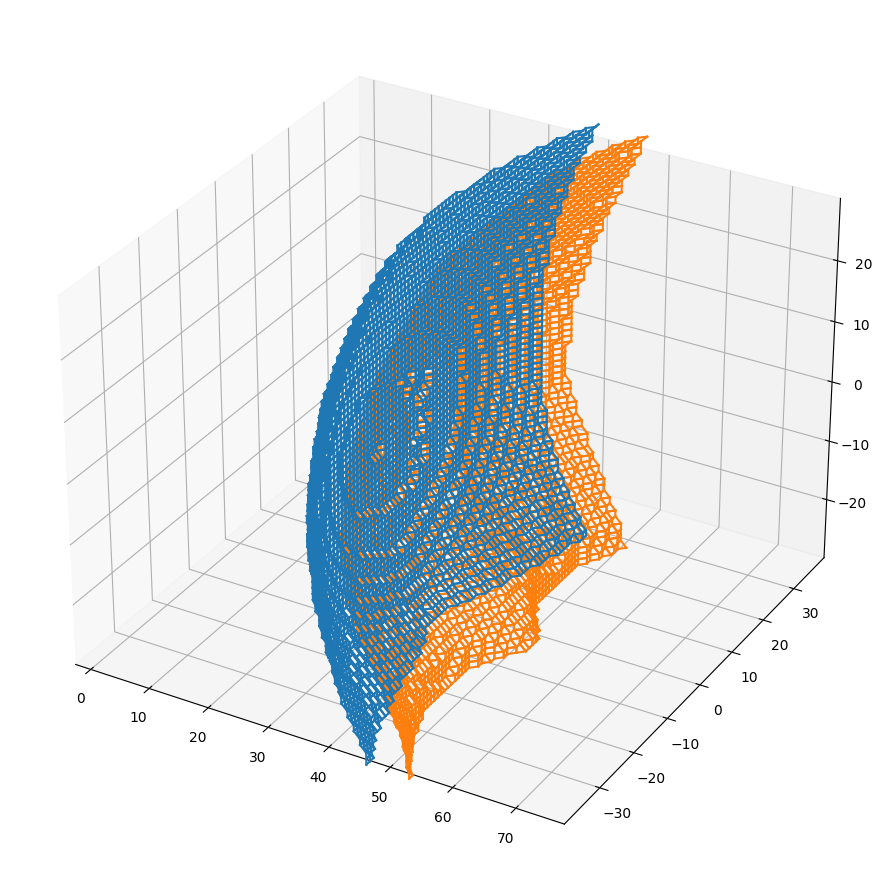

In [11]:
# Plot skull surfaces
plt.rcParams["figure.figsize"] = [9, 9]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for cell in cells:
    # Inner surface
    ax.plot(
        [skull_surface_inner[cell[0], 0], skull_surface_inner[cell[1], 0]],
        [skull_surface_inner[cell[0], 1], skull_surface_inner[cell[1], 1]],
        [skull_surface_inner[cell[0], 2], skull_surface_inner[cell[1], 2]],
        "C0")

    ax.plot(
        [skull_surface_inner[cell[1], 0], skull_surface_inner[cell[2], 0]],
        [skull_surface_inner[cell[1], 1], skull_surface_inner[cell[2], 1]],
        [skull_surface_inner[cell[1], 2], skull_surface_inner[cell[2], 2]],
        "C0")
    
    ax.plot(
        [skull_surface_inner[cell[2], 0], skull_surface_inner[cell[3], 0]],
        [skull_surface_inner[cell[2], 1], skull_surface_inner[cell[3], 1]],
        [skull_surface_inner[cell[2], 2], skull_surface_inner[cell[3], 2]],
        "C0")
    
    ax.plot(
        [skull_surface_inner[cell[3], 0], skull_surface_inner[cell[0], 0]],
        [skull_surface_inner[cell[3], 1], skull_surface_inner[cell[0], 1]],
        [skull_surface_inner[cell[3], 2], skull_surface_inner[cell[0], 2]],
        "C0")
    
    # Outer surface  
    ax.plot(
        [skull_surface_outer[cell[0], 0], skull_surface_outer[cell[1], 0]],
        [skull_surface_outer[cell[0], 1], skull_surface_outer[cell[1], 1]],
        [skull_surface_outer[cell[0], 2], skull_surface_outer[cell[1], 2]],
        "C1")
    
    ax.plot(
        [skull_surface_outer[cell[1], 0], skull_surface_outer[cell[2], 0]],
        [skull_surface_outer[cell[1], 1], skull_surface_outer[cell[2], 1]],
        [skull_surface_outer[cell[1], 2], skull_surface_outer[cell[2], 2]],
        "C1")

    ax.plot(
        [skull_surface_outer[cell[2], 0], skull_surface_outer[cell[3], 0]],
        [skull_surface_outer[cell[2], 1], skull_surface_outer[cell[3], 1]],
        [skull_surface_outer[cell[2], 2], skull_surface_outer[cell[3], 2]],
        "C1")
    
    ax.plot(
        [skull_surface_outer[cell[3], 0], skull_surface_outer[cell[0], 0]],
        [skull_surface_outer[cell[3], 1], skull_surface_outer[cell[0], 1]],
        [skull_surface_outer[cell[3], 2], skull_surface_outer[cell[0], 2]],
        "C1")
    
plt.axis("scaled")
plt.show()